In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, LabelEncoder


Input bảng cân đối số phát sinh và bảng kê chứng từ của doanh nghiệp

In [ ]:
bcdps_ = r'D:\Project Audit DA\1. Bảng cân đối số phát sinh.xlsx'
bkct_  = r'D:\Project Audit DA\2. Bảng kê chứng từ.xlsx'

df_bcdps = pd.read_excel(bcdps_)
df_bkct  = pd.read_excel(bkct_)


Đọc sơ qua dữ liệu

In [28]:
df_bcdps.info()
df_bkct.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tài khoản      161 non-null    object
 1   Tên tài khoản  161 non-null    object
 2   Dư Nợ đầu      161 non-null    int64 
 3   Dư Có đầu      161 non-null    int64 
 4   Ps Nợ          161 non-null    int64 
 5   Ps Có          161 non-null    int64 
 6   Dư Nợ cuối     161 non-null    int64 
 7   Dư Có cuối     161 non-null    int64 
 8   Lũy kế Nợ      161 non-null    int64 
 9   Lũy kế Có      161 non-null    int64 
 10  Dau_TK         161 non-null    object
dtypes: int64(8), object(3)
memory usage: 14.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89186 entries, 0 to 89185
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Mã Ct          89185 non-null  object        
 1   Loại Ct        891

In [32]:
print(df_bkct.shape)
print(df_bcdps.shape)


(89186, 22)
(161, 11)


In [36]:
print(df_bcdps.isnull().sum())
print(df_bkct.isnull().sum())

Tài khoản        0
Tên tài khoản    0
Dư Nợ đầu        0
Dư Có đầu        0
Ps Nợ            0
Ps Có            0
Dư Nợ cuối       0
Dư Có cuối       0
Lũy kế Nợ        0
Lũy kế Có        0
Dau_TK           0
dtype: int64
Mã Ct                1
Loại Ct              3
Ngày Ct              3
Số Ct                3
Diễn giải            0
Tên Đối tượng        2
Đối tượng            1
Tiền Nt              1
Tỷ giá               1
Tiền                 0
Tk nợ                1
TK nợ 3              1
Tk có                1
TK có 3              1
Mã Đt nợ             1
Mã Đt có             1
Số Ct gốc        12249
Khoản mục            1
Tháng                3
Ngày                 3
Thứ                  3
Flag_TuKhoa      88859
dtype: int64


Nhận thấy data có một số chỗ missing, ta sẽ tiến hành clean data

In [ ]:
df_bcdps.columns = df_bcdps.columns.str.strip()
df_bkct.columns = df_bkct.columns.str.strip()
numerical_cols = ['Dư Nợ đầu', 'Dư Có đầu', 'Ps Nợ', 'Ps Có', 
              'Dư Nợ cuối', 'Dư Có cuối', 'Lũy kế Nợ', 'Lũy kế Có']
df_bcdps.dropna(how='all', inplace=True)
df_bcdps.dropna(how='all', inplace=True)


Tiếp theo ta sẽ tiến hành phân tích sơ bộ, bằng cách xuất Tổng tài sản, Nợ phải trả, Vốn chủ sỡ hữu, Lợi nhuận ST, từ đó tính tỉ số nợ trên tài sản, ROA và ROE

In [12]:
#Calculations
df_bcdps['Dau_TK'] = df_bcdps['Tài khoản'].astype(str).str.strip().str[0]
#Capital structure
tong_tai_san = df_bcdps[df_bcdps['Dau_TK'].isin(['1', '2'])]['Dư Nợ cuối'].sum()
tong_no = df_bcdps[df_bcdps['Dau_TK'] == '3']['Dư Có cuối'].sum()
von_chu_so_huu = df_bcdps[df_bcdps['Dau_TK'] == '4']['Dư Có cuối'].sum()
#Profit after tax (using account 421)
tk_421 = df_bcdps[df_bcdps['Tài khoản'].astype(str).str.startswith('421')]
lnst = tk_421['Dư Có cuối'].sum() - tk_421['Dư Nợ cuối'].sum()
#Print results
print("-" * 40)
print("KẾT QUẢ PHÂN TÍCH SƠ BỘ")
print("-" * 40)
print(f"1. Tổng Tài sản:      {tong_tai_san:,.0f} VNĐ")
print(f"2. Nợ Phải trả:       {tong_no:,.0f} VNĐ")
print(f"3. Vốn Chủ sở hữu:    {von_chu_so_huu:,.0f} VNĐ")
print(f"4. Lợi nhuận ST:      {lnst:,.0f} VNĐ")
print("-" * 40)
#Ratios
if tong_tai_san > 0:
    print(f"-> Tỷ số Nợ/Tài sản:  {(tong_no / tong_tai_san * 100):.2f}%")
    print(f"-> ROA (LN/Tài sản):  {(lnst / tong_tai_san * 100):.2f}%")
if von_chu_so_huu > 0:
    print(f"-> ROE (LN/Vốn CSH):  {(lnst / von_chu_so_huu * 100):.2f}%")

----------------------------------------
KẾT QUẢ PHÂN TÍCH SƠ BỘ
----------------------------------------
1. Tổng Tài sản:      1,404,807,453,832 VNĐ
2. Nợ Phải trả:       1,351,475,742,148 VNĐ
3. Vốn Chủ sở hữu:    44,681,306,592 VNĐ
4. Lợi nhuận ST:      29,681,306,592 VNĐ
----------------------------------------
-> Tỷ số Nợ/Tài sản:  96.20%
-> ROA (LN/Tài sản):  2.11%
-> ROE (LN/Vốn CSH):  66.43%


Tiếp đấy, ta tính tỉ lệ tài sản ngắn hạn trên tài sản và cơ cấu nguồn vốn

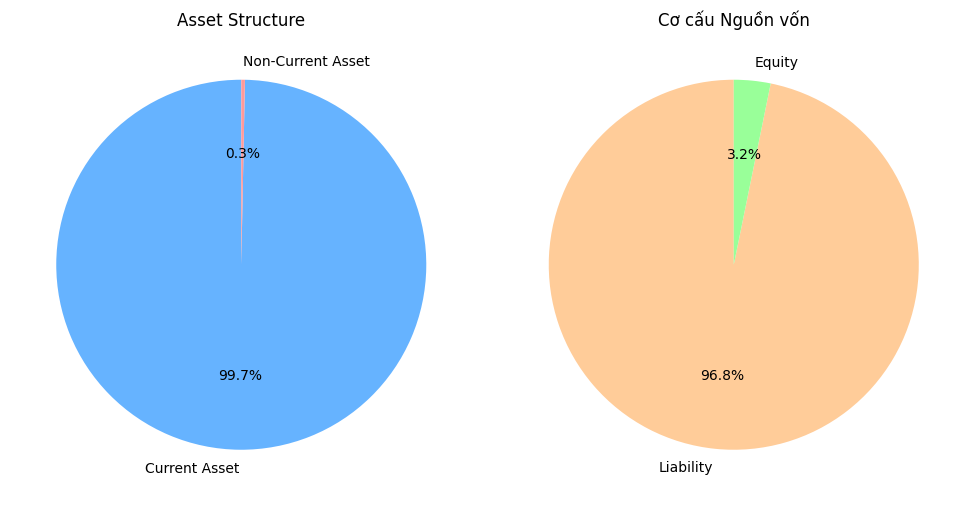

In [ ]:
#Asset, Liability and Equity Structure Visualization
#Current asset and Non-current asset
ts_ngan_han = df_bcdps[df_bcdps['Dau_TK'] == '1']['Dư Nợ cuối'].sum()
ts_dai_han  = df_bcdps[df_bcdps['Dau_TK'] == '2']['Dư Nợ cuối'].sum()
#Chart Visualization
labels = ['Current Asset', 'Non-Current Asset']
sizes = [ts_ngan_han, ts_dai_han]
colors = ['#66b3ff', '#ff9999']
plt.figure(figsize=(10, 5))
#Chart1: Asset Structure
plt.subplot(1, 2, 1) #1 hàng, 2 cột, vị trí 1
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Asset Structure')
#Chart2: Capital Structure
labels_nv = ['Liability', 'Equity']
sizes_nv = [tong_no, von_chu_so_huu]
colors_nv = ['#ffcc99', '#99ff99']
plt.subplot(1, 2, 2) #Vị trí 2
plt.pie(sizes_nv, labels=labels_nv, colors=colors_nv, autopct='%1.1f%%', startangle=90)
plt.title('Cơ cấu Nguồn vốn')

plt.tight_layout()
plt.show()

Tỉ lệ tài sản ngắn hạn trên tổng tài sản là 99.7% -> Công ty có tính chất của 1 doanh nghiệp thương mại (không phải doanh nghiệp sản xuất)
Nợ phải trả chiếm 96.8% nguồn vốn -> Rủi ro cao, công ty gần như phụ thuộc vào dòng tiền này
Tiếp đấy ta phân tích chi tiết nguồn vốn và nợ phải trả

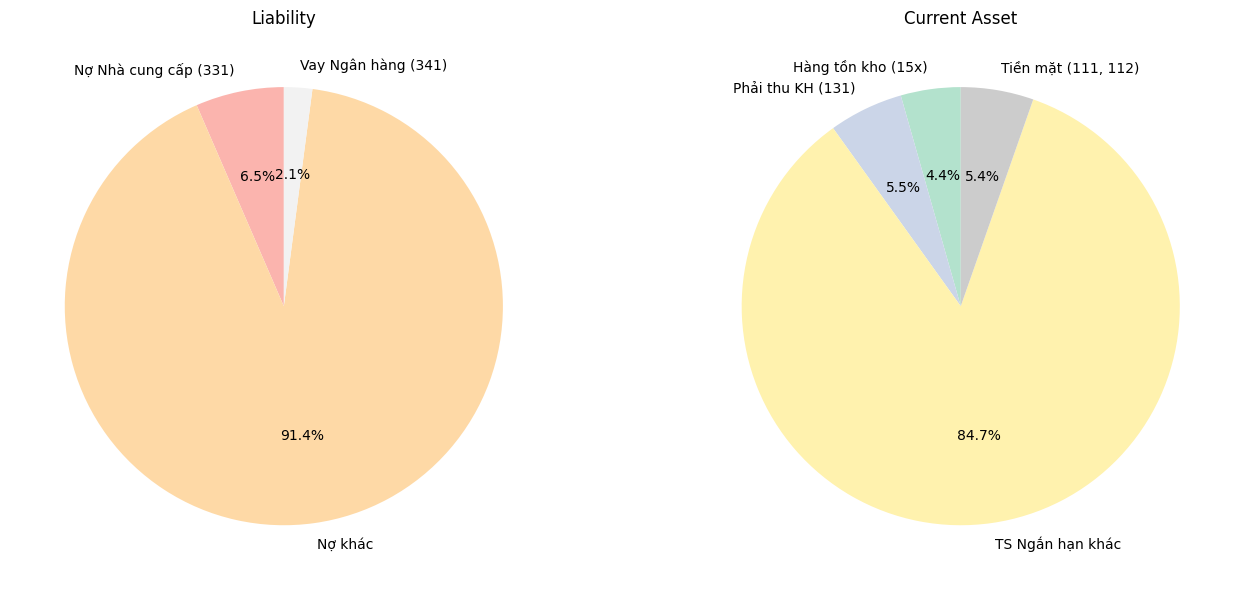

--- CHI TIẾT CẤU TRÚC NỢ ---
Loai_No
Nợ Nhà cung cấp (331)       88,017,970,800
Nợ khác                  1,235,245,966,876
Vay Ngân hàng (341)         28,211,804,472
Name: Dư Có cuối, dtype: object

--- CHI TIẾT TÀI SẢN ---
Loai_TS
Hàng tồn kho (15x)        61,825,921,413
Phải thu KH (131)         76,849,280,626
TS Ngắn hạn khác       1,186,489,796,373
Tiền mặt (111, 112)       75,180,968,972
Name: Dư Nợ cuối, dtype: object


In [ ]:
#Equity and Liability Detailed Analysis
no_phai_tra = df_bcdps[df_bcdps['Dau_TK'] == '3'].copy()
#Account 341 and 331 and else
def phan_loai_no(tk):
    if tk.startswith('341'): return 'Vay Ngân hàng (341)'
    elif tk.startswith('331'): return 'Nợ Nhà cung cấp (331)'
    else: return 'Nợ khác'
#Sort data based on original account
no_phai_tra['Loai_No'] = no_phai_tra['Tài khoản'].astype(str).apply(phan_loai_no)
#Total liabilities
tong_hop_no = no_phai_tra.groupby('Loai_No')['Dư Có cuối'].sum()
#Detailed Current Asset Analysis
tai_san_nh = df_bcdps[df_bcdps['Dau_TK'] == '1'].copy()

def phan_loai_ts(tk):
    if tk.startswith('11'): return 'Tiền mặt (111, 112)'
    elif tk.startswith('131'): return 'Phải thu KH (131)'
    elif tk.startswith('15'): return 'Hàng tồn kho (15x)'
    else: return 'TS Ngắn hạn khác'

tai_san_nh['Loai_TS'] = tai_san_nh['Tài khoản'].astype(str).apply(phan_loai_ts)
tong_hop_ts = tai_san_nh.groupby('Loai_TS')['Dư Nợ cuối'].sum()

#Data visulization 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
#Liability Chart
tong_hop_no.plot(kind='pie', ax=ax1, autopct='%1.1f%%', startangle=90, cmap='Pastel1')
ax1.set_ylabel('')
ax1.set_title('Liability')
#Asset Chart
tong_hop_ts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90, cmap='Pastel2')
ax2.set_ylabel('')
ax2.set_title('Current Asset')

plt.tight_layout()
plt.show()

#print
print("--- CHI TIẾT CẤU TRÚC NỢ ---")
print(tong_hop_no.apply(lambda x: f"{x:,.0f}"))
print("\n--- CHI TIẾT TÀI SẢN ---")
print(tong_hop_ts.apply(lambda x: f"{x:,.0f}"))



Kết luận: Tài sản của công ty không phải là hàng hóa hay tiền mặt, mà là một khoản mục bí ẩn nào đó (12, 136, 138, 24).
Với cấu trúc: Tài sản khác (85%) & Nợ khác (91%), đây có thể là một dấu hiệu của mô hình: Công ty nắm giữ/đầu tư: Huy động vốn (Nợ khác) để đầu tư/cho vay hoặc ủy thác (Tài sản khác), không trực tiếp sản xuất và kinh doanh hoặc Công ty "Sân sau" (SPV): Được thành lập để điều chuyển dòng tiền trong tập đoàn.
Tiếp theo, ta phân tích Khả năng Thanh toán lãi vay, Cashflow quality check và Mô hình Altman Z-Score

In [15]:
#Net Profit After Tax 
#Estimated from previous analysis results
lnst = 29681306592 
#Corporate Income Tax (Get from Credit side of account 3334)
thue_tndn = df_bcdps[df_bcdps['Tài khoản'].astype(str).str.startswith('3334')]['Ps Có'].sum()
#Interest Expense (Get from Debit side of account 635)
chi_phi_lai_vay = df_bcdps[df_bcdps['Tài khoản'].astype(str).str.startswith('635')]['Ps Nợ'].sum()
#EBIT (Earnings Before Interest and Taxes)
ebit = lnst + thue_tndn + chi_phi_lai_vay
#Ratios
print("-" * 50)
print("SURVIVAL & RISK ANALYSIS REPORT")
print("-" * 50)
#Interest Coverage Ratio
if chi_phi_lai_vay > 0:
    interest_coverage = ebit / chi_phi_lai_vay
    print(f"1. Interest Expense:        {chi_phi_lai_vay:,.0f} VND")
    print(f"-> Interest Coverage Ratio: {interest_coverage:.2f}x")
    
    if interest_coverage < 1.5:
        print("WARNING: High Risk! Earnings barely cover interest expenses.")
    elif interest_coverage > 5:
        print("SAFE: Comfortable capacity to pay interest.")
    else:
        print("MODERATE: Interest coverage is acceptable.")
else:
    print("1. Interest Expense: 0 VND")
    print("->POSITIVE: The massive debt load is interest-free (Capital Appropriation).")

#Cash Flow Quality Check
tien_dau_ky = df_bcdps[df_bcdps['Tài khoản'].astype(str).str.startswith(('111', '112'))]['Dư Nợ đầu'].sum()
tien_cuoi_ky = df_bcdps[df_bcdps['Tài khoản'].astype(str).str.startswith(('111', '112'))]['Dư Nợ cuối'].sum()
chenh_lech_tien = tien_cuoi_ky - tien_dau_ky

print("\n2. Quality of Earnings (Cash Flow Check):")
print(f"   - Net Profit After Tax:  {lnst:,.0f} VND")
print(f"   - Net Change in Cash:    {chenh_lech_tien:,.0f} VND")

if chenh_lech_tien < 0 and lnst > 0:
    print("WARNING: Paper Profit - Cash Drain.")
    print("(Profit is tied up in Receivables or other 'phantom' assets).")
elif chenh_lech_tien > lnst:
    print("POSITIVE: Cash Flow is stronger than Profit.")
    print("(Efficient collection or capital injection).")
else:
    print("STABLE: Cash position moves in line with profit.")

#C. Altman Z-Score (Emerging Market / Private Firm Model)
#Z = 6.56*T1 + 3.26*T2 + 6.72*T3 + 1.05*T4
#T1 = Working Capital / Total Assets
#T2 = Retained Earnings / Total Assets
#T3 = EBIT / Total Assets
#T4 = Book Value of Equity / Total Liabilities

tong_tai_san = 1404807453832 
tong_no = 1351475742148
von_chu_so_huu = 44681306592

#Calculating T-factors
wc = (df_bcdps[df_bcdps['Dau_TK']=='1']['Dư Nợ cuối'].sum() - 
      df_bcdps[df_bcdps['Dau_TK']=='3']['Dư Có cuối'].sum())
t1 = wc / tong_tai_san
t2 = lnst / tong_tai_san #Using Net Income as proxy for Retained Earnings variation
t3 = ebit / tong_tai_san
t4 = von_chu_so_huu / tong_no

z_score = 6.56*t1 + 3.26*t2 + 6.72*t3 + 1.05*t4

print(f"\n3. Altman Z-Score (Bankruptcy Prediction): {z_score:.2f}")

if z_score < 1.1:
    print("High probability of bankruptcy/financial failure.")
elif z_score > 2.6:
    print("SAFE ZONE: Low probability of bankruptcy.")
else:
    print("GREY ZONE: Financial health is uncertain. Needs monitoring.")
print("-" * 50)

--------------------------------------------------
SURVIVAL & RISK ANALYSIS REPORT
--------------------------------------------------
1. Interest Expense:        8,702,714,774 VND
-> Interest Coverage Ratio: 4.41x
MODERATE: Interest coverage is acceptable.

2. Quality of Earnings (Cash Flow Check):
   - Net Profit After Tax:  29,681,306,592 VND
   - Net Change in Cash:    -21,785,540,479 VND
(Profit is tied up in Receivables or other 'phantom' assets).

3. Altman Z-Score (Bankruptcy Prediction): 0.52
High probability of bankruptcy/financial failure.
--------------------------------------------------


Ta thấy Doanh nghiệp vẫn còn đủ khả năng trả lãi dù không ở mức an toàn tuyệt đối
Ngoài ra Doanh nghiệp ghi nhận lãi nhưng tiền lại chảy ra khỏi túi và output Z-Score cho thấy tỉ lệ phá sản khá cao
Để làm rõ việc này, tay sẽ vẽ heat map giao dịch và doanh thu để phân tích

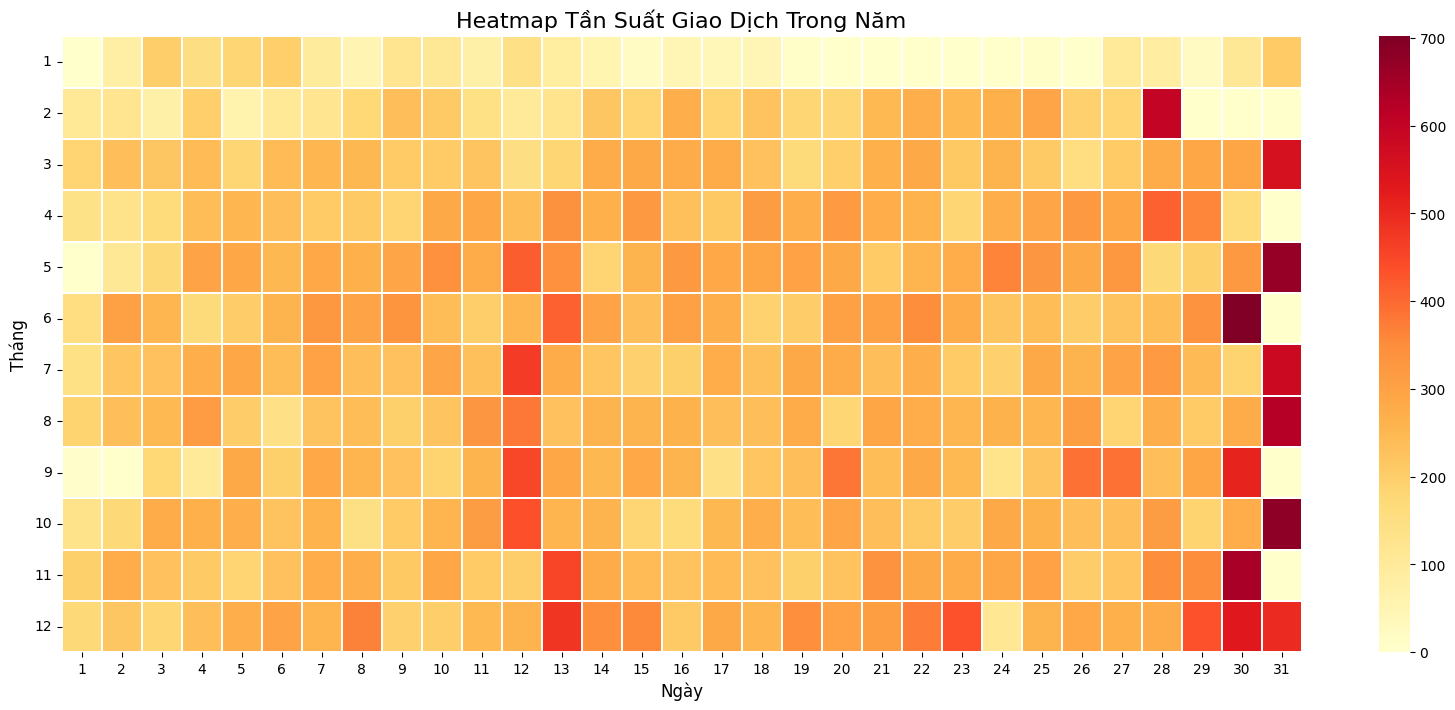

In [16]:
#Transaction heatmap visualization
df_bkct['Ngày Ct'] = pd.to_datetime(df_bkct['Ngày Ct'], errors='coerce')
df_bkct['Tháng'] = df_bkct['Ngày Ct'].dt.month
df_bkct['Ngày'] = df_bkct['Ngày Ct'].dt.day
#Pivot Table
heatmap_data = df_bkct.pivot_table(index='Tháng', columns='Ngày', values='Số Ct', aggfunc='count')
heatmap_data = heatmap_data.fillna(0)
heatmap_data.index = heatmap_data.index.astype(int)
heatmap_data.columns = heatmap_data.columns.astype(int)
#Heatmap visualization
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=.1, annot=False)
plt.title('Heatmap Tần Suất Giao Dịch Trong Năm', fontsize=16)
plt.ylabel('Tháng', fontsize=12)
plt.xlabel('Ngày', fontsize=12)
plt.yticks(rotation=0) 

plt.show()

Revenue: 20323 revenue lines (account 511)


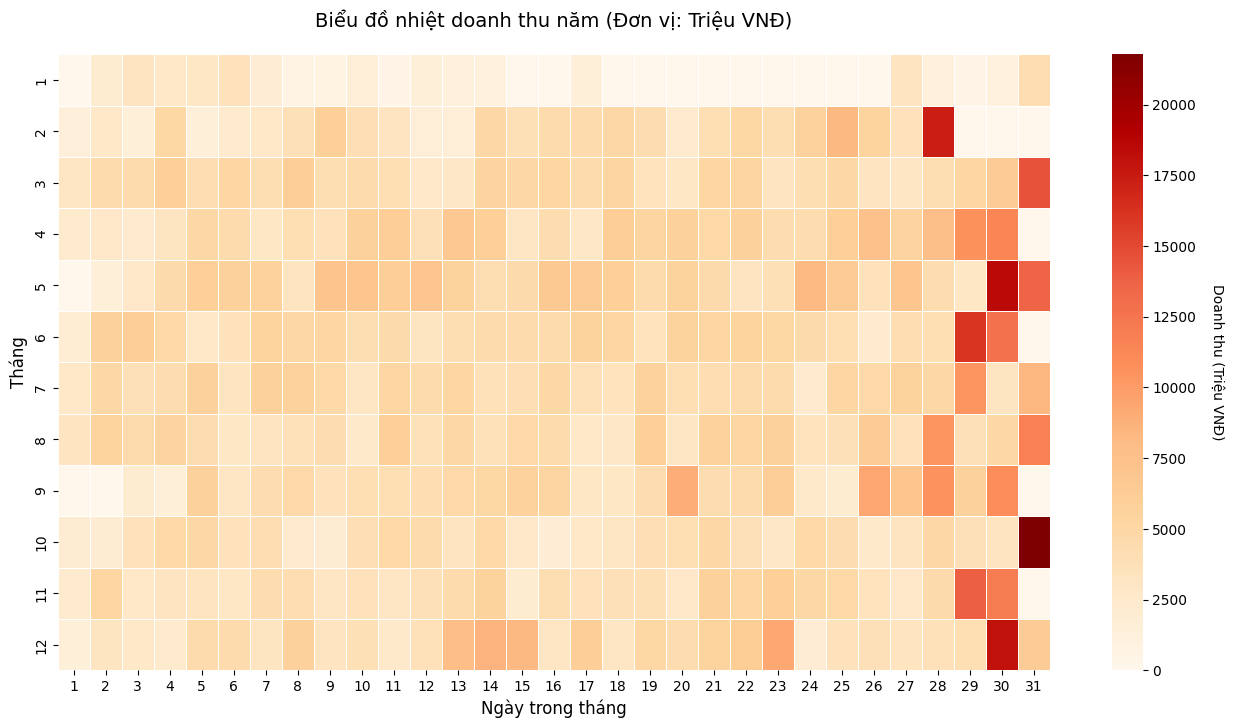

In [ ]:
#Revenue Heatmap Visualization
df_bkct.columns = df_bkct.columns.str.strip()
df_bkct['Ngày Ct'] = pd.to_datetime(df_bkct['Ngày Ct'], dayfirst=True, errors='coerce')
df_bkct['Tiền'] = pd.to_numeric(df_bkct['Tiền'], errors='coerce').fillna(0)
#Revenue check
df_doanh_thu = df_bkct[df_bkct['TK có 3'].astype(str).str.strip() == '511'].copy()
#Data check
if df_doanh_thu.empty:
    print("Can't find any revenue data (account 511). Please check the data.")
else:
    print(f"Revenue: {len(df_doanh_thu)} revenue lines (account 511)")

    #Heatmap preparation
    #Date processing
    df_doanh_thu['Tháng'] = df_doanh_thu['Ngày Ct'].dt.month
    df_doanh_thu['Ngày'] = df_doanh_thu['Ngày Ct'].dt.day
    #Revebue pivot table
    revenue_pivot = df_doanh_thu.pivot_table(
        index='Tháng', 
        columns='Ngày', 
        values='Tiền', 
        aggfunc='sum'
    ).fillna(0)

    #Unit: million dong
    revenue_pivot_million = revenue_pivot / 1_000_000
    #Heatmap visualization
    plt.figure(figsize=(16, 8))
    #cmap='OrRd': Color Orange -> Red
    ax = sns.heatmap(revenue_pivot_million, cmap='OrRd', linewidths=.5, annot=False)
    plt.title('Biểu đồ nhiệt doanh thu năm (Đơn vị: Triệu VNĐ)', fontsize=14, pad=20)
    plt.ylabel('Tháng', fontsize=12)
    plt.xlabel('Ngày trong tháng', fontsize=12)
    cbar = ax.collections[0].colorbar
    cbar.set_label('Doanh thu (Triệu VNĐ)', rotation=270, labelpad=20)

    plt.show()


Ta nhận thấy doanh thu và giao dịch của Doanh nghiệp tập trung ở cuối tháng chủ yếu, ta sẽ kiểm tra các giao dịch phát sinh trong các ngày trong tuần để thấy có gì bất thường không

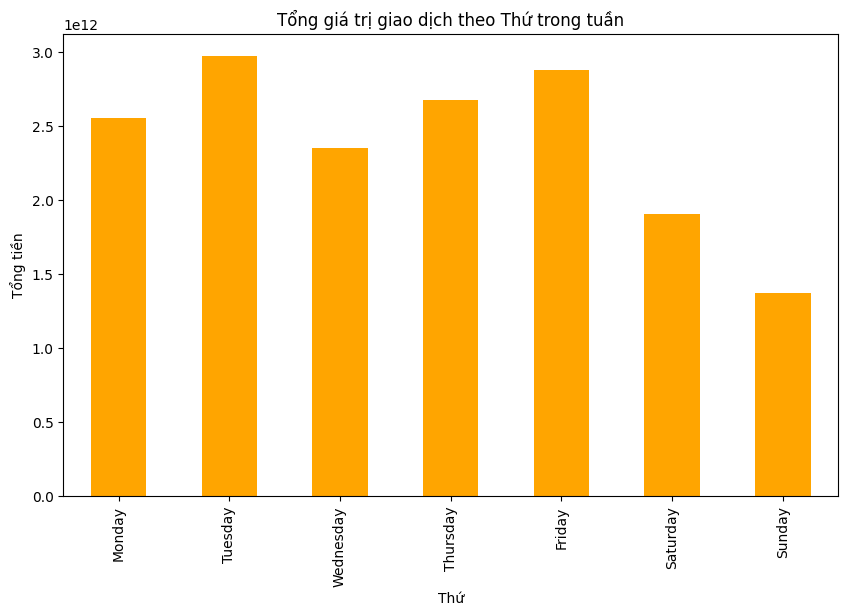

In [18]:
#Transaction based on Weekday Analysis
df_bkct['Thứ'] = df_bkct['Ngày Ct'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekend_analysis = df_bkct.groupby('Thứ')['Tiền'].sum().reindex(days_order)
#Chart vísualization
weekend_analysis.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Tổng giá trị giao dịch theo Thứ trong tuần')
plt.ylabel('Tổng tiền')
plt.show()


Sau khi không thấy gì bất thường, ta tiếp tục kiểm tra các giao dịch có các từ khóa nhạy cảm

C:\Users\Admin\AppData\Local\Temp\ipykernel_38188\335555753.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_suspicious, y='Flag_TuKhoa',


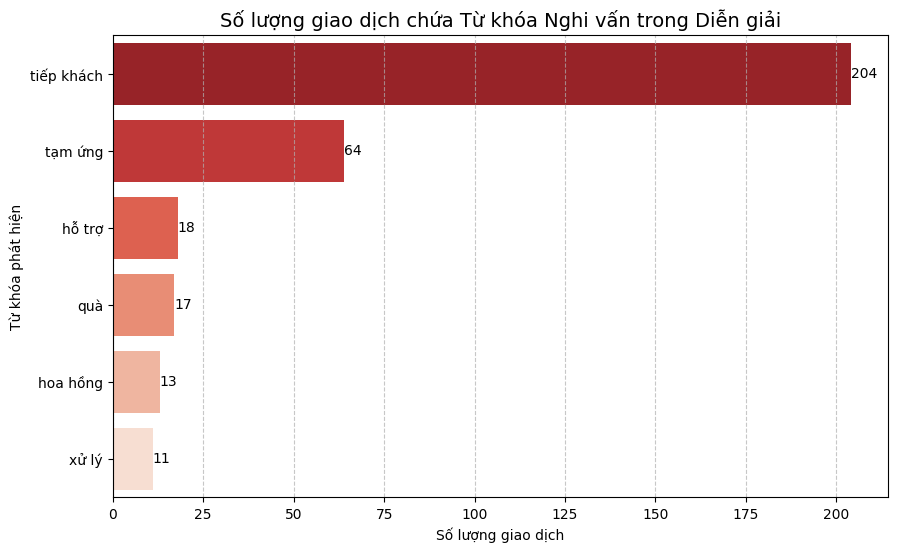

In [19]:
#List of susppicious keywords
keywords = ['tiếp khách', 'quà', 'hoa hồng', 'biếu', 'hỗ trợ', 'xử lý', 'thủ tục', 'tạm ứng']
#Suspicious keyword flagging function
def flag_suspicious(text):
    if pd.isna(text): return None
    text = str(text).lower()
    for kw in keywords:
        if kw in text:
            return kw
    return None
#New column for flagged keywords
df_bkct['Flag_TuKhoa'] = df_bkct['Diễn giải'].apply(flag_suspicious)
#Filter rows with keywords
df_suspicious = df_bkct[df_bkct['Flag_TuKhoa'].notnull()]
#Figure visualization
plt.figure(figsize=(10, 6))
#Transaction count by keyword
ax = sns.countplot(data=df_suspicious, y='Flag_TuKhoa',
                   order=df_suspicious['Flag_TuKhoa'].value_counts().index,
                   palette='Reds_r') #Màu đỏ thể hiện cảnh báo

plt.title('Số lượng giao dịch chứa Từ khóa Nghi vấn trong Diễn giải', fontsize=14)
plt.xlabel('Số lượng giao dịch')
plt.ylabel('Từ khóa phát hiện')
plt.grid(axis='x', linestyle='--', alpha=0.7)
for container in ax.containers:
    ax.bar_label(container)

plt.show()

Doanh nghiệp có lượng lớn giao dịch liên quan đến tiếp khách trong năm, cần phải kiểm tra lại các khoản này, đặc biệt các khoản có từ khóa tiếp khách cao bất thường

In [47]:
#Filter transactions related to "Tiếp khách"
df_tiep_khach = df_bkct[df_bkct['Diễn giải'].str.contains('Tiếp khách', case=False, na=False)]
top_10_tiep_khach = df_tiep_khach.sort_values(by='Tiền', ascending=False).head(10)
cols_to_view = ['Ngày Ct', 'Số Ct', 'Diễn giải', 'Tiền', 'Tk nợ', 'TK có 3']
print(f"Tìm thấy tổng cộng {len(df_tiep_khach)} giao dịch liên quan đến 'Tiếp khách'.")
print("TOP 10 GIAO DỊCH 'TIẾP KHÁCH' CÓ SỐ PHÁT SINH CAO NHẤT:")
top_10_tiep_khach[cols_to_view]

Tìm thấy tổng cộng 204 giao dịch liên quan đến 'Tiếp khách'.
TOP 10 GIAO DỊCH 'TIẾP KHÁCH' CÓ SỐ PHÁT SINH CAO NHẤT:


,Ngày Ct,Số Ct,Diễn giải,Tiền,Tk nợ,TK có 3
37853,2023-06-23,PK051.0623,Chi phí tiếp khách HĐ 426,259250000.0,64113,331
26802,2023-05-15,PK014.0523,Chi phí tiếp khách HĐ 3680,110512500.0,64175,331
22897,2023-04-30,PK086.0423,Chi phí tiệc tiếp khách HBM HĐ 575,76010000.0,64175,331
18230,2023-04-13,PK014.0423,Chi phí tiếp khách Hoa Sen HĐ 495,73528000.0,64175,331
7663,2023-02-28,PK045.0223,Chi phí tiếp khách T2,42703100.0,64175,331
79827,2023-11-30,PK094.1123,Chi phí phòng nghỉ và tiếp khách T11 HĐ 1621+1620,40091573.0,64171,331
15222,2023-03-31,PK106.0323,Chi phí tiếp khách T3,39223500.0,64175,331
3672,2023-02-10,PK011.0223,Chi phí tiếp khách HĐ 22,36106000.0,64175,331
48116,2023-07-31,PK067.0723,Chi phí phòng nghỉ và tiếp khách T7 HĐ 1015,31574074.0,64171,331
10578,2023-03-13,PK005.0323,Chi phí tiếp khách HD 31,30828000.0,64175,331


Tiếp theo, ta sẽ thực hiện flux analysis trên các khoản chi phí

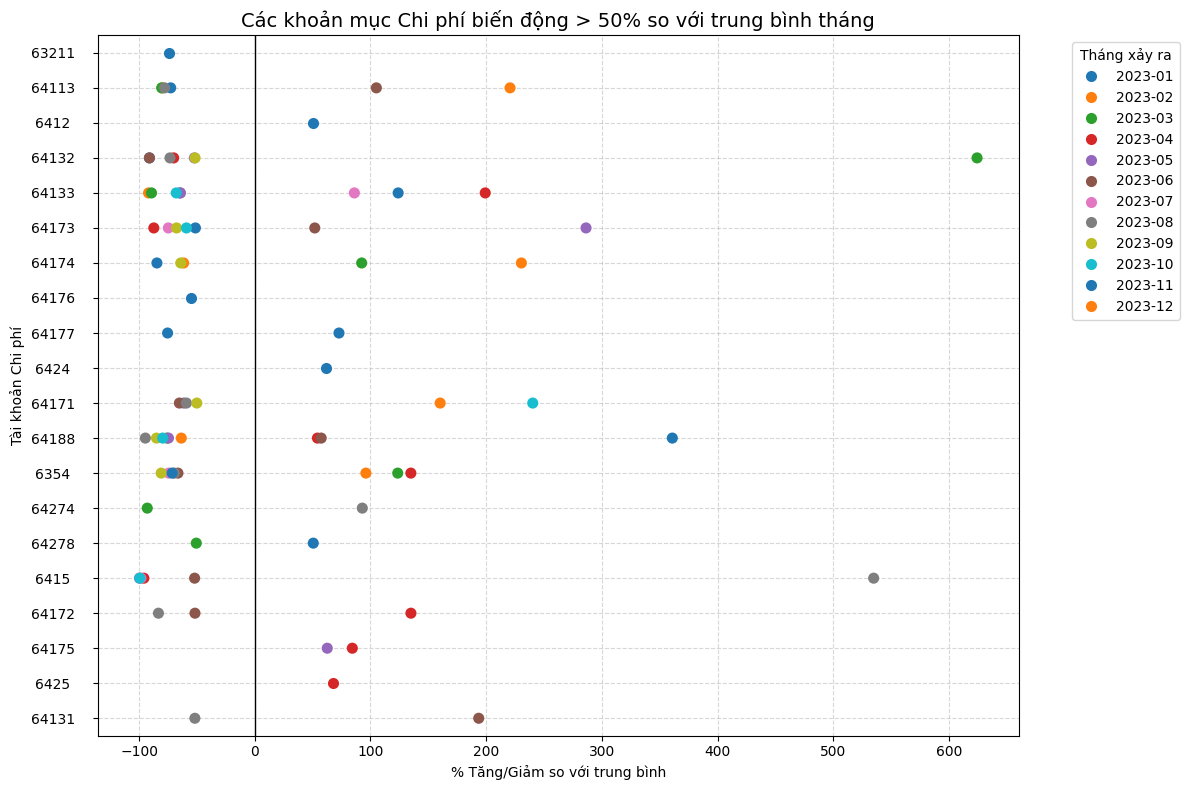

In [20]:
#Flux analysis on Expense Accounts
#Expense account (6xx account)
df_bkct['Tháng'] = df_bkct['Ngày Ct'].dt.to_period('M')
#Sort 6xx accounts
df_cost = df_bkct[df_bkct['Tk nợ'].astype(str).str.startswith('6')]
monthly_cost = df_cost.groupby(['Tháng', 'Tk nợ'])['Tiền'].sum().reset_index()
#Calculate average monthly cost per account
avg_cost = monthly_cost.groupby('Tk nợ')['Tiền'].mean().reset_index()
avg_cost.rename(columns={'Tiền': 'Trung_Binh_Nam'}, inplace=True)
#Deviation calculation
merged_df = monthly_cost.merge(avg_cost, on='Tk nợ')
merged_df['Do_Lech'] = merged_df['Tiền'] - merged_df['Trung_Binh_Nam']
merged_df['Phan_Tram_Lech'] = (merged_df['Do_Lech'] / merged_df['Trung_Binh_Nam']) * 100
#Sort data based > 50% deviation
significant_flux = merged_df[abs(merged_df['Phan_Tram_Lech']) > 50]
#Figure visualization
plt.figure(figsize=(12, 8))
sns.stripplot(data=significant_flux, x='Phan_Tram_Lech', y='Tk nợ', 
              hue='Tháng', size=8, palette='tab10', jitter=False)

plt.axvline(x=0, color='black', linestyle='-', linewidth=1) #Đường trục giữa
plt.title('Các khoản mục Chi phí biến động > 50% so với trung bình tháng', fontsize=14)
plt.xlabel('% Tăng/Giảm so với trung bình')
plt.ylabel('Tài khoản Chi phí')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Tháng xảy ra')
plt.tight_layout()
plt.show()

In [21]:
#Filter Expense Accounts (Accounts starting with 6 or 8)
df_expenses = df_bkct[df_bkct['Tk nợ'].astype(str).str.match(r'^(6|8)')].copy()
pivot_df = df_expenses.pivot_table(index='Tk nợ', columns='Tháng', values='Tiền', aggfunc='sum', fill_value=0)
#Sort pivot to have top accounts on top
top_accounts = pivot_df.sum(axis=1).sort_values(ascending=False).index
pivot_df = pivot_df.loc[top_accounts]

print("Đã chuẩn bị xong bảng dữ liệu tổng hợp theo tháng.")
print(pivot_df.head())

Đã chuẩn bị xong bảng dữ liệu tổng hợp theo tháng.
Tháng          2023-01       2023-02       2023-03       2023-04  \
Tk nợ                                                              
63211     3.281727e+10  1.125146e+11  1.406281e+11  1.437527e+11   
64176     1.957548e+09  5.043391e+09  3.271129e+09  5.221710e+09   
64111     1.311347e+09  1.340891e+09  1.405110e+09  1.404374e+09   
6354      3.062197e+08  4.414423e+08  7.967244e+08  8.372141e+08   
64188     0.000000e+00  9.765526e+07  6.470242e+07  4.124696e+08   

Tháng          2023-05       2023-06       2023-07       2023-08  \
Tk nợ                                                              
63211     1.645247e+11  1.450364e+11  1.396507e+11  1.405833e+11   
64176     5.459548e+09  6.270445e+09  2.756267e+09  3.092130e+09   
64111     1.404374e+09  1.405578e+09  1.393435e+09  1.478993e+09   
6354      3.964361e+08  1.197676e+08  9.145989e+07  1.083410e+08   
64188     6.793142e+07  4.211584e+08  3.903827e+08  1.448952e+07

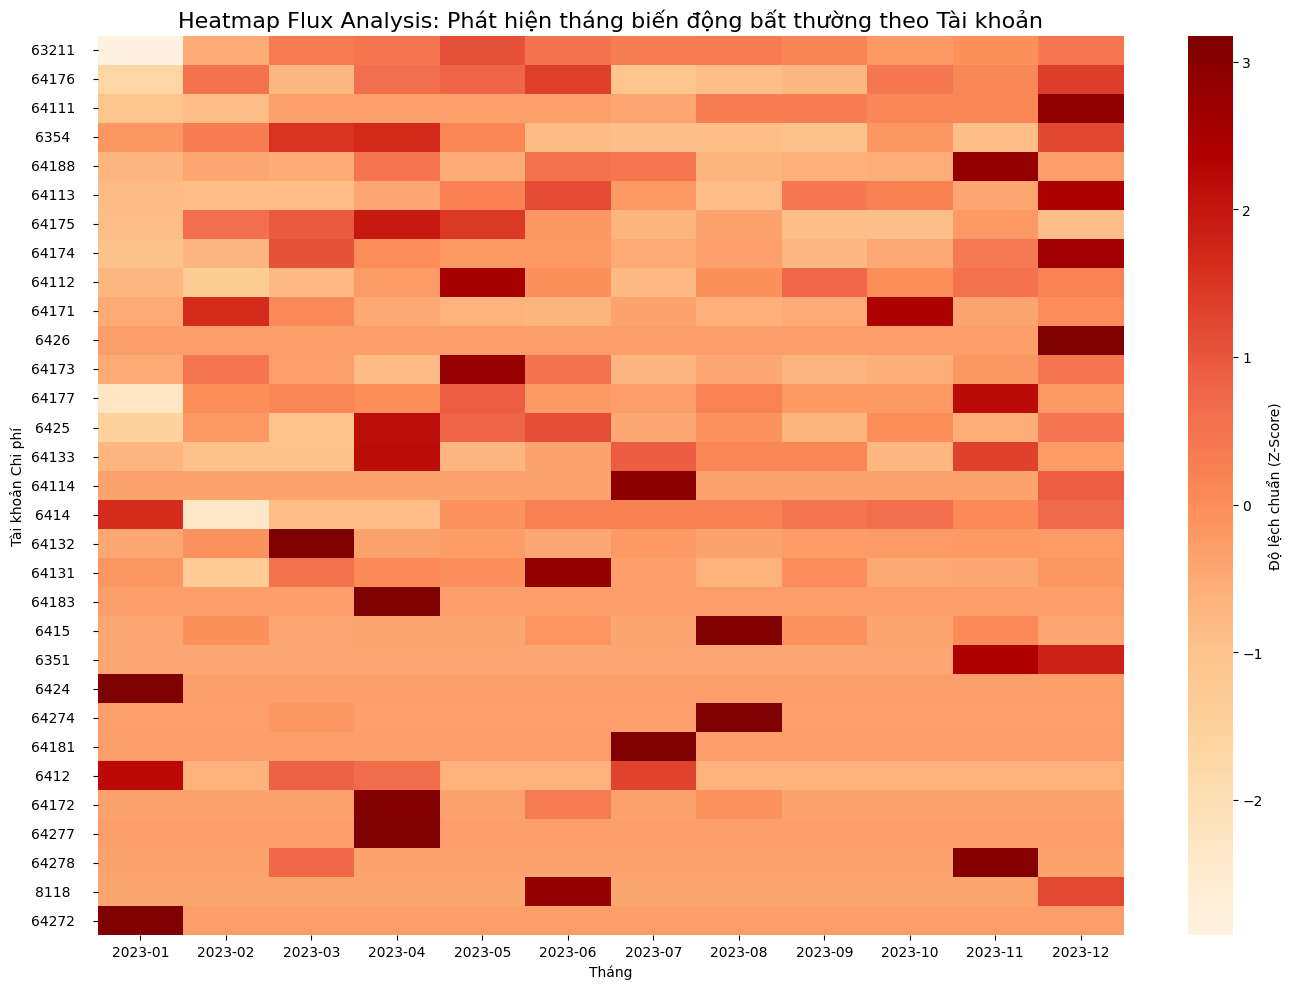

In [22]:
#Z-score each account
pivot_zscore = pivot_df.apply(lambda x: (x - x.mean()) / x.std() if x.std() != 0 else 0, axis=1)
#Heatmap visualization of Z-score
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_zscore, 
            cmap='OrRd',        #Đỏ là cao, Xanh là thấp
            center=0,             #Điểm giữa là trung bình
            annot=False,          #Không hiện số (để đỡ rối mắt)
            cbar_kws={'label': 'Độ lệch chuẩn (Z-Score)'})

plt.title('Heatmap Flux Analysis: Phát hiện tháng biến động bất thường theo Tài khoản', fontsize=16)
plt.xlabel('Tháng')
plt.ylabel('Tài khoản Chi phí')
plt.yticks(rotation=0) #Giữ tên tài khoản nằm ngang cho dễ đọc
plt.tight_layout()
plt.show()


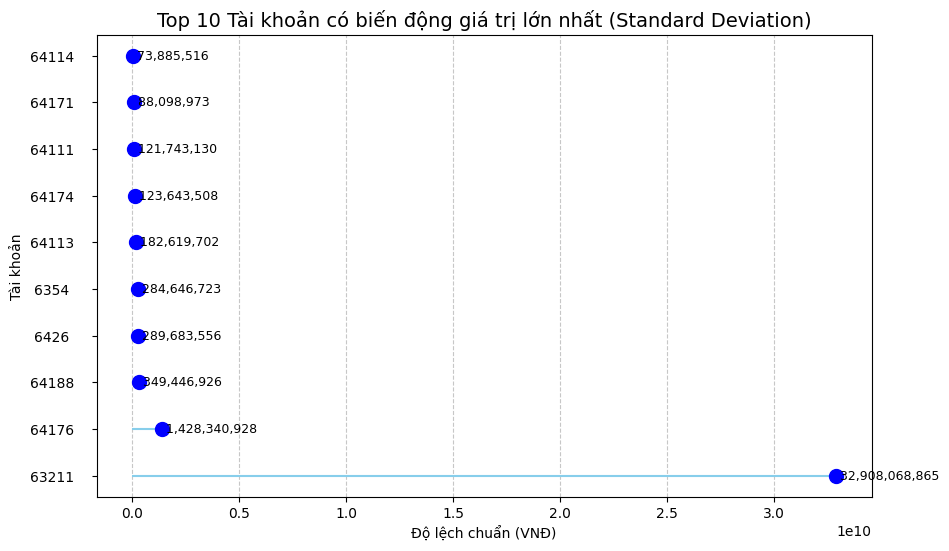

In [23]:
#Mounth avg and Volatility Calculation
monthly_avg = pivot_df.mean(axis=1)
volatility = pivot_df.std(axis=1)
#Create DataFrame for analysis
flux_metrics = pd.DataFrame({
    'Trung bình tháng': monthly_avg,
    'Độ biến động (Std)': volatility
})

#flux metrics calculation to find most volatile accounts
flux_metrics['CV'] = flux_metrics['Độ biến động (Std)'] / flux_metrics['Trung bình tháng']
top_volatile = flux_metrics.sort_values('Độ biến động (Std)', ascending=False).head(10)
#figure visualization
plt.figure(figsize=(10, 6))
plt.hlines(y=top_volatile.index, xmin=0, xmax=top_volatile['Độ biến động (Std)'], color='skyblue')
plt.plot(top_volatile['Độ biến động (Std)'], top_volatile.index, "o", markersize=10, color='blue')
plt.title('Top 10 Tài khoản có biến động giá trị lớn nhất (Standard Deviation)', fontsize=14)
plt.xlabel('Độ lệch chuẩn (VNĐ)')
plt.ylabel('Tài khoản')
plt.grid(axis='x', linestyle='--', alpha=0.7)
for i, value in enumerate(top_volatile['Độ biến động (Std)']):
    plt.text(value, i, f" {value:,.0f}", va='center', fontsize=9)

plt.show()

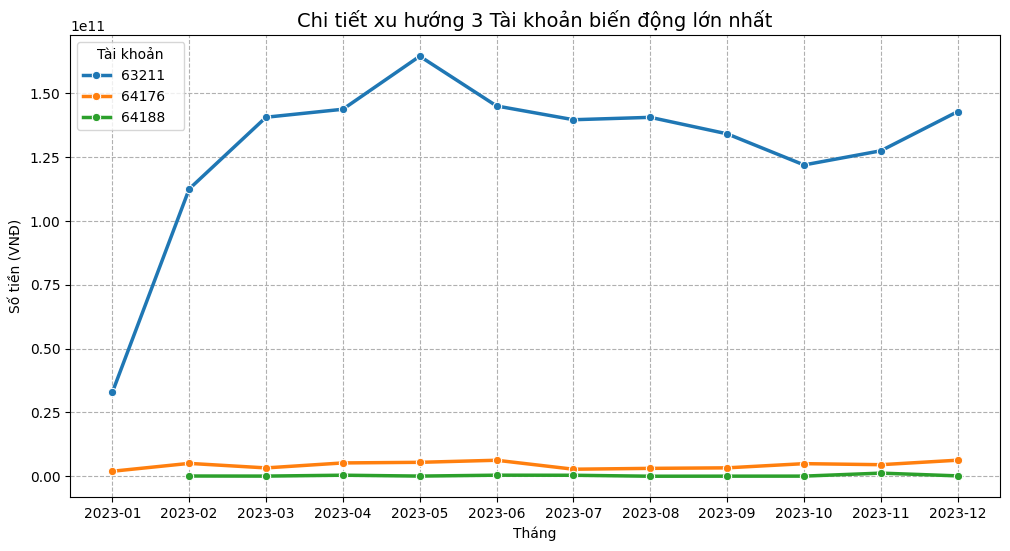

In [24]:
#Sort top 3 volatile accounts for trend analysis
target_accs = top_volatile.index[:3] 
df_trend = df_expenses[df_expenses['Tk nợ'].isin(target_accs)]
df_trend_grouped = df_trend.groupby(['Tháng', 'Tk nợ'])['Tiền'].sum().reset_index()
df_trend_grouped['Tháng'] = df_trend_grouped['Tháng'].astype(str) #Convert lại string để vẽ
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_trend_grouped, x='Tháng', y='Tiền', hue='Tk nợ', marker='o', linewidth=2.5)
plt.title('Chi tiết xu hướng 3 Tài khoản biến động lớn nhất', fontsize=14)
plt.ylabel('Số tiền (VNĐ)')
plt.grid(True, linestyle='--')
plt.legend(title='Tài khoản')
plt.show()

Sau khi tổng hợp biến động ở các tài khoản chi phí, ta sẽ phân tích Benford's Law để xem các giao dịch có "tự nhiên không"

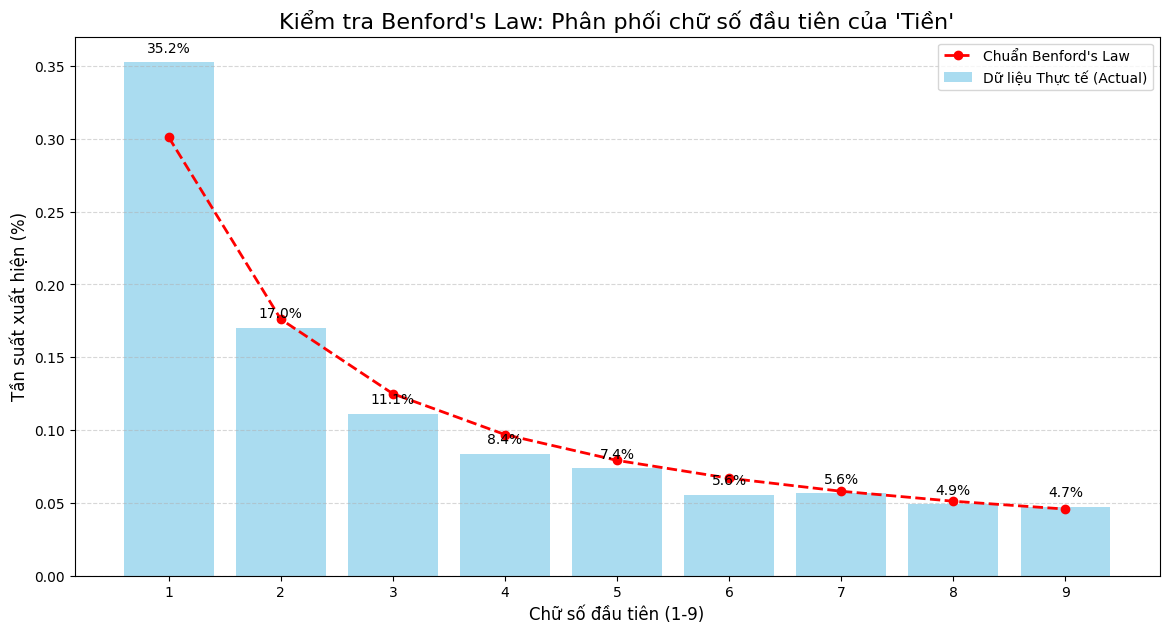

   Chữ số  Thực tế (%)  Benford (%)  Chênh lệch (%)
0       1    35.243788    30.103000        5.140788
1       2    17.037095    17.609126       -0.572031
2       3    11.120705    12.493874       -1.373169
3       4     8.374451     9.691001       -1.316551
4       5     7.361846     7.918125       -0.556278
5       6     5.574370     6.694679       -1.120309
6       7     5.646138     5.799195       -0.153057
7       8     4.906029     5.115252       -0.209224
8       9     4.735579     4.575749        0.159830


In [ ]:
#Benford's Law Analysis
transactions = df_bkct[df_bkct['Tiền'] > 0]['Tiền'].copy()

#Leading Digit
first_digits = transactions.astype(str).str[0].astype(int)
#Actual Frequency Calculation
actual_counts = first_digits.value_counts(normalize=True).sort_index()
#Make sure to include all numbers from 1 to 9 (in case the data is missing some numbers)
actual_counts = actual_counts.reindex(range(1, 10), fill_value=0)
#Generate Benford Standard Data (Theory)
#Formula: P(d) = log10(1 + 1/d)
benford_probs = [np.log10(1 + 1/d) for d in range(1, 10)]
benford_df = pd.Series(benford_probs, index=range(1, 10))
#Chart Visualization
plt.figure(figsize=(14, 7))
bars = plt.bar(actual_counts.index, actual_counts.values, 
               color='skyblue', alpha=0.7, label='Dữ liệu Thực tế (Actual)')
#Benford line
plt.plot(benford_df.index, benford_df.values, 
         color='red', marker='o', linewidth=2, linestyle='--', label="Chuẩn Benford's Law")
#Value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, 
             f'{yval*100:.1f}%', ha='center', va='bottom', fontsize=10)

plt.title("Kiểm tra Benford's Law: Phân phối chữ số đầu tiên của 'Tiền'", fontsize=16)
plt.xlabel('Chữ số đầu tiên (1-9)', fontsize=12)
plt.ylabel('Tần suất xuất hiện (%)', fontsize=12)
plt.xticks(range(1, 10))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()
#print
comparison = pd.DataFrame({
    'Chữ số': range(1, 10),
    'Thực tế (%)': actual_counts.values * 100,
    'Benford (%)': benford_df.values * 100,
    'Chênh lệch (%)': (actual_counts.values - benford_df.values) * 100
})
print(comparison)


Phân phối Benford cho thấy phân phối chữ số đầu tiên không có độ chênh nhiều số với tỉ lệ chuẩn (trừ việc số 1 lệch khá nhiều, điều này thường thấy ở các doanh nghiệp Việt Nam)
Tiếp theo ta sẽ tạo mô hình dự đoán giao dịch bất thường diễn ra bằng thuật toán isolation forest

In [49]:
#Backup Data
data_model = df_bkct.copy()
#Data preparation
data_model['Weekday'] = data_model['Ngày Ct'].dt.weekday
data_model['Is_Weekend'] = data_model['Weekday'].apply(lambda x: 1 if x >= 5 else 0)
data_model['Day_of_Month'] = data_model['Ngày Ct'].dt.day
#Use Logarithm to handle large differences in money (avoid model bias)
#Add 1 to avoid log(0)
data_model['Log_Amount'] = np.log1p(data_model['Tiền'])
#Account processing with Label Encoding
le = LabelEncoder()
data_model['Tk_No_Encode'] = le.fit_transform(data_model['Tk nợ'].astype(str)) 
data_model['Tk_Co_Encode'] = le.fit_transform(data_model['TK có 3'].astype(str))
features = ['Log_Amount', 'Tk_No_Encode', 'Tk_Co_Encode', 'Day_of_Month', 'Is_Weekend']
X = data_model[features]
#Handle missing values if any
X = X.fillna(0)
#Scaling
#Isolation Forest 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#Train model isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
model.fit(X_scaled)

#Forecast anomalies
#1 is normal, -1 is anomaly
data_model['Anomaly_Score'] = model.decision_function(X_scaled) #Điểm bất thường (càng thấp càng bất thường)
data_model['Anomaly'] = model.predict(X_scaled)

anomalies = data_model[data_model['Anomaly'] == -1]

print(f"Tổng số giao dịch: {len(data_model)}")
print(f"Số giao dịch bị đánh dấu bất thường: {len(anomalies)}")
print("-" * 50)
print("TOP 5 GIAO DỊCH BẤT THƯỜNG NHẤT (Dựa trên Score):")
#Sortby lowest score and print relevant columns
#print(anomalies.sort_values('Anomaly_Score')[['Ngày Ct', 'Diễn giải', 'Tiền', 'Tk nợ', 'TK có 3']].head(10))
print(anomalies.sort_values('Anomaly_Score')[['Ngày Ct', 'Tiền', 'Tk nợ', 'TK có 3']].head(10))

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Tổng số giao dịch: 89186
Số giao dịch bị đánh dấu bất thường: 1784
--------------------------------------------------
TOP 5 GIAO DỊCH BẤT THƯỜNG NHẤT (Dựa trên Score):
         Ngày Ct       Tiền     Tk nợ TK có 3
89185        NaT        0.0       NaN     NaN
48194 2023-07-31 -8020149.0  7118         911
71757 2023-10-31      350.0  7118         911
42279 2023-07-10      129.0  6425         515
28812 2023-05-23       67.0  6425         515
49251 2023-08-05      911.0  6425         515
31748 2023-06-01      344.0  6425         515
72514 2023-11-04      897.0  6425         515
2590  2023-02-04     1797.0  6425         515
8476  2023-03-04      760.0  6425         515


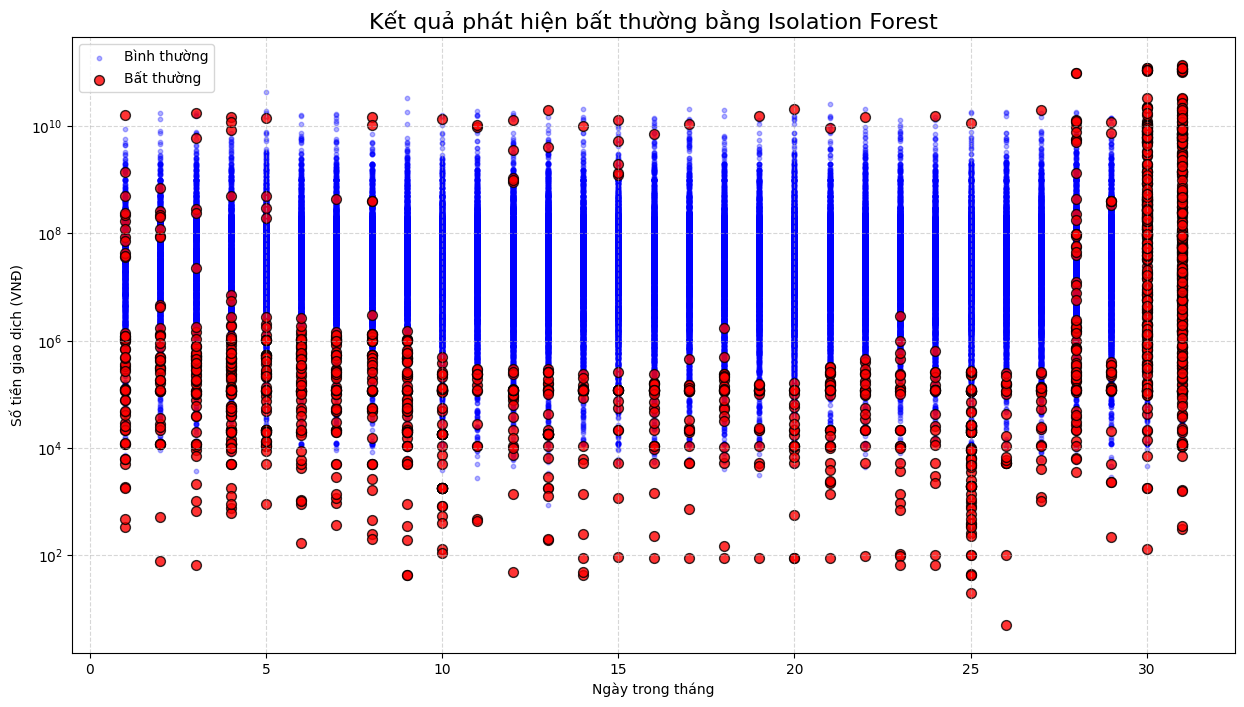

In [27]:
#Scatter plot visualization of anomalies
plt.figure(figsize=(15, 8))

#Normal points (blue)
normal = data_model[data_model['Anomaly'] == 1]
plt.scatter(normal['Day_of_Month'], normal['Tiền'], c='blue', alpha=0.3, s=10, label='Bình thường')

#Anomal points (red)
outliers = data_model[data_model['Anomaly'] == -1]
plt.scatter(outliers['Day_of_Month'], outliers['Tiền'], c='red', alpha=0.8, s=50, edgecolors='black', label='Bất thường')

plt.title('Kết quả phát hiện bất thường bằng Isolation Forest', fontsize=16)
plt.xlabel('Ngày trong tháng')
plt.ylabel('Số tiền giao dịch (VNĐ)')
plt.yscale('log') 
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()